In [1]:
import numpy as np 
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC

In [4]:
feature=["Class Name","Left-Weight"," Left-Distance","Right-Weight","Right-Distance"]

balance_scale = pd.read_csv("balance_scale.csv",names=feature,header=None)


In [7]:
df=pd.DataFrame(data=balance_scale)

In [8]:
df.head()

,Class Name,Left-Weight,Left-Distance,Right-Weight,Right-Distance
0,B,1,1,1,1
1,R,1,1,1,2
2,R,1,1,1,3
3,R,1,1,1,4
4,R,1,1,1,5


In [9]:
df.dtypes

Class Name        object
Left-Weight        int64
 Left-Distance     int64
Right-Weight       int64
Right-Distance     int64
dtype: object

In [10]:
df.describe()

,Left-Weight,Left-Distance,Right-Weight,Right-Distance
count,625.000000,625.000000,625.000000,625.000000
mean,3.000000,3.000000,3.000000,3.000000
std,1.415346,1.415346,1.415346,1.415346
min,1.000000,1.000000,1.000000,1.000000
25%,2.000000,2.000000,2.000000,2.000000
50%,3.000000,3.000000,3.000000,3.000000
75%,4.000000,4.000000,4.000000,4.000000
max,5.000000,5.000000,5.000000,5.000000


In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 625 entries, 0 to 624
Data columns (total 5 columns):
Class Name        625 non-null object
Left-Weight       625 non-null int64
 Left-Distance    625 non-null int64
Right-Weight      625 non-null int64
Right-Distance    625 non-null int64
dtypes: int64(4), object(1)
memory usage: 24.5+ KB


In [13]:
df['Class Name'] = LabelEncoder().fit_transform(df['Class Name'].tolist())

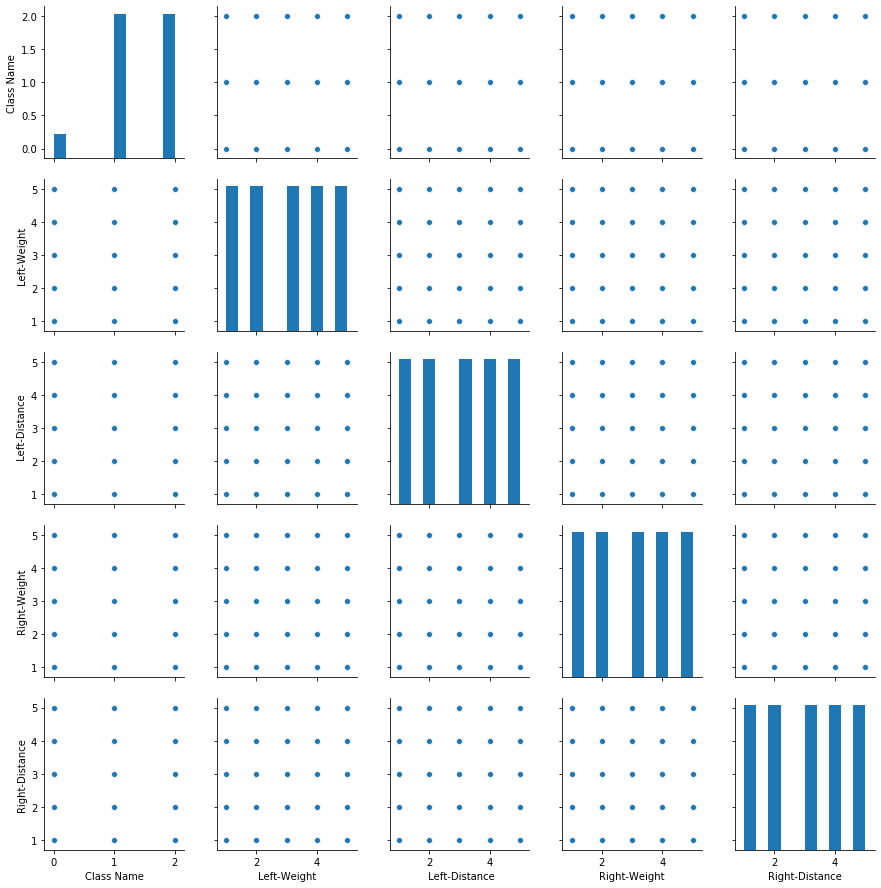

In [14]:
sns.pairplot(data=df)

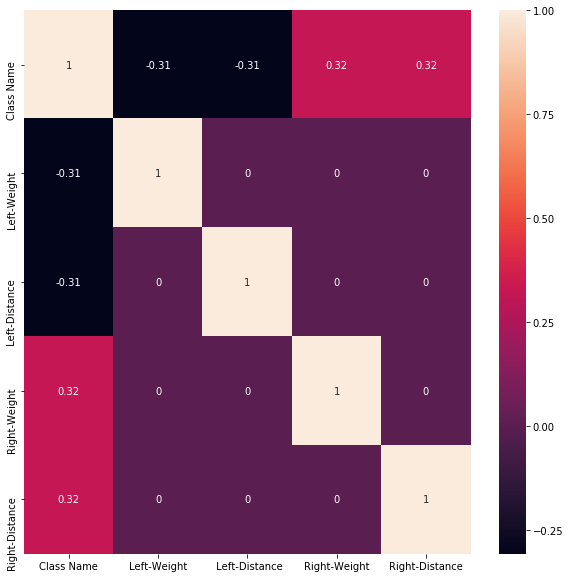

In [15]:
corr_hmap=df.corr()
plt.figure(figsize=(10,10))
sns.heatmap(corr_hmap,annot=True)
plt.show()


In [19]:
x=df.iloc[:,1:5].values

In [22]:
x.shape

(625, 4)

In [26]:
y=df.iloc[:,0].values
y=y.reshape(-1,1)

In [28]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.22,random_state=40)

In [29]:
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(487, 4)
(487, 1)
(138, 4)
(138, 1)


In [31]:
import warnings as wrn
wrn.filterwarnings('ignore')
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

In [41]:
from sklearn.metrics import accuracy_score as score
clf = RandomForestClassifier(n_estimators=1000, n_jobs=-1, )
clf.fit(x_train, y_train)
pred = clf.predict(x_test)
print('Accuracy in percent = ',score(pred, y_test)*100)

Accuracy in percent =  85.5072463768116


In [43]:
clf = DecisionTreeClassifier()
clf.fit(x_train, y_train)
pred = clf.predict(x_test)
print('Accuracy in percent = ',score(pred, y_test)*100)

Accuracy in percent =  77.53623188405797


In [44]:
clf = SVC()
clf.fit(x_train, y_train)
pred = clf.predict(x_test)
print('Accuracy in percent = ',score(pred, y_test)*100)

Accuracy in percent =  91.30434782608695


In [45]:
from xgboost import XGBClassifier

In [47]:
xgb = XGBClassifier(learning_rate=0.5, n_jobs=-1, n_estimators=1000)
clf.fit(x_train, y_train)
pred = clf.predict(x_test)
print('Accuracy in percent = ',score(pred, y_test)*100)

Accuracy in percent =  92.02898550724638


In [48]:
from sklearn.externals import joblib

In [49]:
joblib.dump(xgb,"xgbsave")

['xgbsave']

In [50]:
import pickle

In [51]:
s=pickle.dumps(xgb)
clf2=pickle.loads(s)

In [52]:
clf2

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.5, max_delta_step=0, max_depth=3,
              min_child_weight=1, missing=nan, n_estimators=1000, n_jobs=-1,
              nthread=None, objective='binary:logistic', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)